In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive

/content/gdrive


In [3]:
cd MyDrive

/content/gdrive/MyDrive


Preprocessing

In [4]:
import pandas as pd
import numpy as np
import plotly.graph_objs as pt
import plotly
import plotly.express as ex
from textblob import TextBlob
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
pkl=pd.read_pickle('redditDataset.pkl')
nltk.download('stopwords')
nltk.download('punkt')
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Section3

In [5]:
id_res = pd.read_csv("IdentityResolution.csv" ,names= ["username","twitter","fb","insta"])

id_res

,username,twitter,fb,insta
0,Alain Stephan Domnguez Lucas,https://www.twitter.com/alainstephan,http://www.facebook.com/alainpato,http://instagram.com/alainstephan
1,Alex Sablan,https://www.twitter.com/AlexSablancom,https://facebook.com/alexsablancom,http://instagram.com/a_sablan
2,Xavier Gass,https://www.twitter.com/XaviGasso,http://www.facebook.com/xgasso,http://instagram.com/xavigasso
3,Nicole Lapin,https://www.twitter.com/NicoleLapin,http://www.facebook.com/nicolelapin,http://instagram.com/nicolelapin
4,Mattan Griffel,https://www.twitter.com/mattangriffel,http://www.facebook.com/mattangriffel,http://instagram.com/mattangriffel
...,...,...,...,...
319,Vasu Chawla,https://twitter.com/VasuChawla,https://facebook.com/vasuchawla26,https://instagram.com/vasuchawla
320,Dayn Wilberding,http://www.twitter.com/dayn,http://www.facebook.com/daynw,http://instagram.com/dayn
321,Guillermo Navarro,https://www.twitter.com/bildenlex,https://www.facebook.com/DRGUILLERMONAVARRO,http://instagram.com/bildenlex
322,Antonio J. Cuevas,https://www.twitter.com/Zeroneuronas,http://www.facebook.com/antonio.j.cuevas,http://instagram.com/zeroneuronas


In [6]:
name=[]
t_name=[]
fb_name=[]
ig_name=[]
#print(id_res['username'][0])
for i in range(len(id_res)):
  name.append(id_res['username'][i])
  temp_t=str(id_res['twitter'][i])
  temp_l_tw=temp_t.split("/")
  if(temp_l_tw[-1]!=""):
    t_name.append(temp_l_tw[-1])
  else:
    t_name.append(temp_l_tw[-2])

  temp_fb=str(id_res['fb'][i])
  temp_l_fb=temp_fb.split("/")
  if(temp_l_fb[-1]!=""):
    fb_name.append(temp_l_fb[-1])
  else:
    fb_name.append(temp_l_fb[-2])

  temp_ig=str(id_res['insta'][i])
  temp_l_ig=temp_ig.split("/")
  if(temp_l_ig[-1]!=""):
    ig_name.append(temp_l_ig[-1])
  else:
    ig_name.append(temp_l_ig[-2])



In [16]:
ed1=[]
ed2=[]
ed3=[]
for i in range(len(id_res)):
  ed2.append(nltk.masi_distance(set(fb_name[i]),set(ig_name[i])))
  ed1.append(nltk.masi_distance(set(t_name[i]),set(fb_name[i])))
  ed3.append(nltk.masi_distance(set(t_name[i]),set(ig_name[i])))
ja1=[]
ja2=[]
ja3=[]
for j in range(len(id_res)):
  ja1.append(nltk.jaccard_distance(set(t_name[j]),set(fb_name[j])))
  ja2.append(nltk.jaccard_distance(set(fb_name[j]),set(ig_name[j])))
  ja3.append(nltk.jaccard_distance(set(t_name[j]),set(ig_name[j])))

Q1(A)

In [8]:
cm_tf=0
cm_fi=0
cm_ti=0
cj_tf=0
cj_fi=0
cj_ti=0
for i in range(len(id_res)):
  if(ed1[i]<ja1[i]):
    cm_tf=cm_tf+1
  elif(ed1[i]>ja1[i]):
    cj_tf=cj_tf+1

  if(ed2[i]<ja2[i]):
    cm_fi=cm_fi+1
  elif(ed2[i]>ja2[i]):
    cj_fi=cj_fi+1
    
  if(ed3[i]<ja3[i]):
    cm_ti=cm_ti+1
  elif(ed3[i]>ja3[i]):
    cj_ti=cj_ti+1
    
print(cm_tf, cj_tf)
print(cm_fi, cj_fi)
print(cm_ti, cj_ti)

if(cm_tf>cj_tf):
  print("Best metric for twitter and Facebook is masi distance metric")
else:
  print("Best metric for twitter and Facebook is jaccard distance metric")
if(cm_fi>cj_fi):
  print("Best metric for Facebookand insta is masi distance metric")
else:
  print("Best metric for Facebook and insta is jaccard distance metric")
if(cm_ti>cj_ti):
  print("Best metric for twitter and insta is masi distance metric")
else:
  print("Best metric for twitter and insta is jaccard distance metric")




233 0
219 0
165 0
Best metric for twitter and Facebook is masi distance metric
Best metric for Facebookand insta is masi distance metric
Best metric for twitter and insta is masi distance metric


Q1(B)

In [9]:
fr_cm_tf=[0 for i in range(5)]
fr_cm_fi=[0 for i in range(5)]
fr_cm_ti=[0 for i in range(5)]
fr_cj_tf=[0 for i in range(5)]
fr_cj_fi=[0 for i in range(5)]
fr_cj_ti=[0 for i in range(5)]
for i in range(len(name)):
  if(ed1[i]>=0 and ed1[i]<.2):
    fr_cm_tf[0]=fr_cm_tf[0]+1
  elif(ed1[i]>=.2 and ed1[i]<.4):
    fr_cm_tf[1]=fr_cm_tf[1]+1
  elif(ed1[i]>=.4 and ed1[i]<.6):
    fr_cm_tf[2]=fr_cm_tf[2]+1
  elif(ed1[i]>=.6 and ed1[i]<.8):
    fr_cm_tf[3]=fr_cm_tf[3]+1
  elif(ed1[i]>=.8 and ed1[i]<=1):
    fr_cm_tf[4]=fr_cm_tf[4]+1

for i in range(len(name)):
  if(ed2[i]>=0 and ed2[i]<.2):
    fr_cm_fi[0]=fr_cm_fi[0]+1
  elif(ed2[i]>=.2 and ed2[i]<.4):
    fr_cm_fi[1]=fr_cm_fi[1]+1
  elif(ed2[i]>=.4 and ed2[i]<.6):
    fr_cm_fi[2]=fr_cm_fi[2]+1
  elif(ed2[i]>=.6 and ed2[i]<.8):
    fr_cm_fi[3]=fr_cm_fi[3]+1
  elif(ed2[i]>=.8 and ed2[i]<=1):
    fr_cm_fi[4]=fr_cm_fi[4]+1
for i in range(len(name)):
  if(ed3[i]>=0 and ed3[i]<.2):
    fr_cm_ti[0]=fr_cm_ti[0]+1
  elif(ed3[i]>=.2 and ed3[i]<.4):
    fr_cm_ti[1]=fr_cm_ti[1]+1
  elif(ed3[i]>=.4 and ed3[i]<.6):
    fr_cm_ti[2]=fr_cm_ti[2]+1
  elif(ed3[i]>=.6 and ed3[i]<.8):
    fr_cm_ti[3]=fr_cm_ti[3]+1
  elif(ed3[i]>=.8 and ed3[i]<=1):
    fr_cm_ti[4]=fr_cm_ti[4]+1
for i in range(len(name)):
  if(ja1[i]>=0 and ja1[i]<.2):
    fr_cj_tf[0]=fr_cj_tf[0]+1
  elif(ja1[i]>=.2 and ja1[i]<.4):
    fr_cj_tf[1]=fr_cj_tf[1]+1
  elif(ja1[i]>=.4 and ja1[i]<.6):
    fr_cj_tf[2]=fr_cj_tf[2]+1
  elif(ja1[i]>=.6 and ja1[i]<.8):
    fr_cj_tf[3]=fr_cj_tf[3]+1
  elif(ja1[i]>=.8 and ja1[i]<=1):
    fr_cj_tf[4]=fr_cj_tf[4]+1

for i in range(len(name)):
  if(ja2[i]>=0 and ja2[i]<.2):
    fr_cj_fi[0]=fr_cj_fi[0]+1
  elif(ja2[i]>=.2 and ja2[i]<.4):
    fr_cj_fi[1]=fr_cj_fi[1]+1
  elif(ja2[i]>=.4 and ja2[i]<.6):
    fr_cj_fi[2]=fr_cj_fi[2]+1
  elif(ja2[i]>=.6 and ja2[i]<.8):
    fr_cj_fi[3]=fr_cj_fi[3]+1
  elif(ja2[i]>=.8 and ja2[i]<=1):
    fr_cj_fi[4]=fr_cj_fi[4]+1
for i in range(len(name)):
  if(ja3[i]>=0 and ja3[i]<.2):
    fr_cj_ti[0]=fr_cj_ti[0]+1
  elif(ja3[i]>=.2 and ja3[i]<.4):
    fr_cj_ti[1]=fr_cj_ti[1]+1
  elif(ja3[i]>=.4 and ja3[i]<.6):
    fr_cj_ti[2]=fr_cj_ti[2]+1
  elif(ja3[i]>=.6 and ja3[i]<.8):
    fr_cj_ti[3]=fr_cj_ti[3]+1
  elif(ja3[i]>=.8 and ja3[i]<=1):
    fr_cj_ti[4]=fr_cj_ti[4]+1
bucket=["[0-0.2)", "[0.2-0.4)", "[0.4-0.6)", "[0.6-0.8)","[0.8-1]"]  



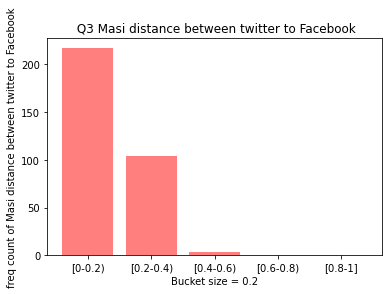

In [10]:

mp.bar(bucket,fr_cm_tf,color='r', align = 'center', alpha = 0.5)
mp.ylabel("freq count of Masi distance between twitter to Facebook")
mp.xlabel('Bucket size = 0.2')
#mp.xticks(rotation = 90)
mp.title(" Q3 Masi distance between twitter to Facebook")
mp.show()
# for i in range(len(ed1)):
#   print(ed2[i], ja2[i])

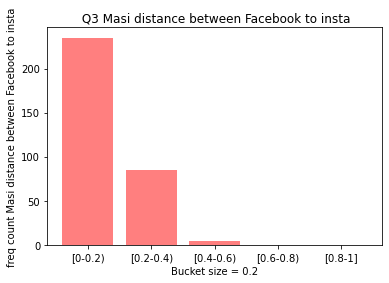

In [11]:
mp.bar(bucket,fr_cm_fi,color='r', align = 'center', alpha = 0.5)
mp.ylabel("freq count Masi distance between Facebook to insta")
mp.xlabel('Bucket size = 0.2')
#mp.xticks(rotation = 90)
mp.title(" Q3 Masi distance between Facebook to insta")
mp.show()

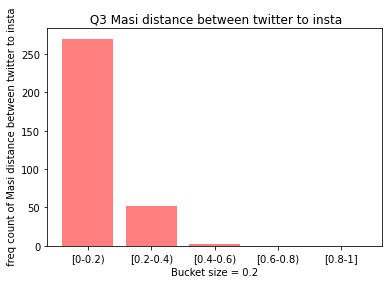

In [17]:
mp.bar(bucket,fr_cm_ti,color='r', align = 'center', alpha = 0.5)
mp.ylabel(" freq count of Masi distance between twitter to insta")
mp.xlabel('Bucket size = 0.2')
#mp.xticks(rotation = 90)
mp.title(" Q3 Masi distance between twitter to insta")
mp.show()

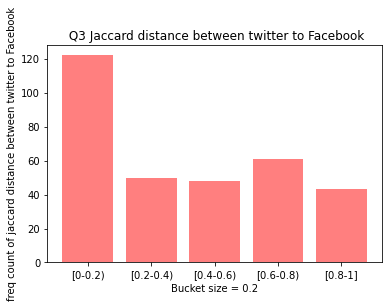

In [18]:
mp.bar(bucket,fr_cj_tf,color='r', align = 'center', alpha = 0.5)
mp.ylabel("freq count of jaccard distance between twitter to Facebook")
mp.xlabel('Bucket size = 0.2')
#mp.xticks(rotation = 90)
mp.title(" Q3 Jaccard distance between twitter to Facebook")
mp.show()

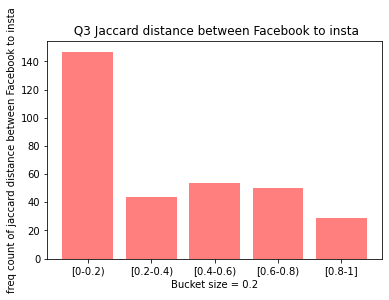

In [19]:
mp.bar(bucket,fr_cj_fi,color='r', align = 'center', alpha = 0.5)
mp.ylabel("freq count of jaccard distance between Facebook to insta")
mp.xlabel('Bucket size = 0.2')
#mp.xticks(rotation = 90)
mp.title(" Q3 Jaccard distance between Facebook to insta")
mp.show()

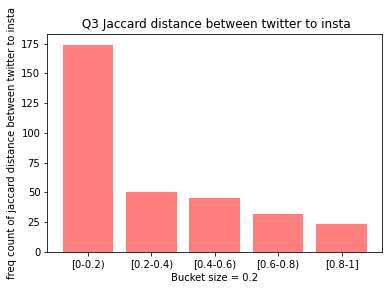

In [20]:
mp.bar(bucket,fr_cj_ti,color='r', align = 'center', alpha = 0.5)
mp.ylabel("freq count of jaccard distance between twitter to insta")
mp.xlabel('Bucket size = 0.2')
#mp.xticks(rotation = 90)
mp.title(" Q3 Jaccard distance between twitter to insta")
mp.show()